<a href="https://colab.research.google.com/github/dinesh-umkc/kdm/blob/main/Gender_Prediction_by_Name_ICP2_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name Gender Identifier

## 1. Building a feature extractor

An idea is to use the last letter of the name to predict the gender. For instance, names ending in *a*, *e* and *i* are likely to be female, while names ending in *k*, *o*, *r*, *s* and *t* are likely to be male.

In [ ]:
# Feature extractor
def gender_features(word):
    return {'last_letter': word[-1]}

gender_features('John')

{'last_letter': 'n'}

The returned dictionary is known as a **feature set**.

## 2. Exploring the `names` corpus

In [ ]:
import nltk
nltk.download('names')

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


True

In [ ]:
from nltk.corpus import names
print(names.readme())

Names Corpus, Version 1.3 (1994-03-29)
Copyright (C) 1991 Mark Kantrowitz
Additions by Bill Ross

This corpus contains 5001 female names and 2943 male names, sorted
alphabetically, one per line.

You may use the lists of names for any purpose, so long as credit is
given in any published work. You may also redistribute the list if you
provide the recipients with a copy of this README file. The lists are
not in the public domain (I retain the copyright on the lists) but are
freely redistributable.  If you have any additions to the lists of
names, I would appreciate receiving them.

Mark Kantrowitz <mkant+@cs.cmu.edu>
http://www-2.cs.cmu.edu/afs/cs/project/ai-repository/ai/areas/nlp/corpora/names/


In [ ]:
names.fileids()

['female.txt', 'male.txt']

In [ ]:
import random
print(random.choices(names.words('female.txt'), k = 10))
print(random.choices(names.words('male.txt'), k = 10))
# names.words('female.txt')[:15]

['Adrien', 'Cate', 'Gerda', 'Ramona', 'Emalee', 'Romy', 'Melina', 'Danika', 'Vena', 'Tori']
['Keith', 'Mikey', 'Percy', 'Magnus', 'Lorenzo', 'Piet', 'Willis', 'Gilbert', 'Giordano', 'Sasha']


## 3. Building the classifier

We need to prepare a list of examples and corresponding class labels.

In [ ]:
labeled_names = ([(name, 'female') for name in names.words('female.txt')] + [(name, 'male') for name in names.words('male.txt')])
random.shuffle(labeled_names) # We shuffle the data so that we can split it by index into training and test data.
labeled_names[:5]

[('Chrissy', 'male'),
 ('Thedric', 'male'),
 ('Ethelda', 'female'),
 ('Kiele', 'female'),
 ('Vivianne', 'female')]

In [ ]:
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
featuresets[:5]

[({'last_letter': 'y'}, 'male'),
 ({'last_letter': 'c'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'e'}, 'female')]

In [ ]:
len(featuresets)

7944

## Naïve Bayes Classifier Algorithm


*   Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.
*   It is mainly used in text classification that includes a high-dimensional training dataset.
* It assumes that the contributions by all attributes are independent and that each contributes equally to the classification problem, a simple classification scheme called Naïve Bayes classification. By analyzing the contribution of each “**independent**” attribute, a conditional probability is determined. A classification is made by combining the impact that the different attributes have on the prediction to be made.

## Why is it Naive? 
Naïve: It is called Naïve because it assumes that the occurrence of a certain feature is independent of the occurrence of other features. Such as if the fruit is identified on the bases of color, shape, and taste, then red, spherical, and sweet fruit is recognized as an apple. Hence each feature individually contributes to identify that it is an apple without depending on each other.
Due to the assumption that all features are independent or unrelated, it cannot learn the relationship between features.

## Bayes Theorem: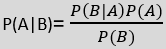



In [ ]:
from nltk import NaiveBayesClassifier

# We split the data into a training (80%) and test (20%) set:
TRAIN_SET_SIZE = round(len(featuresets) * .8)
train_set, test_set = featuresets[:TRAIN_SET_SIZE], featuresets[TRAIN_SET_SIZE:] #last letters

# We also get the names in the test set, to be used later:
test_names = labeled_names[TRAIN_SET_SIZE:] #full names

# print(train_set)

test_names[:15]

[('Perrine', 'female'),
 ('Marsh', 'male'),
 ('Chandler', 'male'),
 ('Fan', 'female'),
 ('Valida', 'female'),
 ('Lucky', 'female'),
 ('Shirah', 'female'),
 ('Gifford', 'male'),
 ('Goldina', 'female'),
 ('Inessa', 'female'),
 ('Fraser', 'male'),
 ('Karola', 'female'),
 ('Valeria', 'female'),
 ('Reynold', 'male'),
 ('Robbi', 'female')]

When working with large corpora, constructing a single list that contains the features of every instance can use up a large amount of memory. 
In these cases, use the function nltk.classify.apply_features, which returns an object that acts like a list but does not store all the feature sets in memory: 
```python
from nltk.classify import apply_features
train_names, test_names = labeled_names[:round(len(featuresets) * .8)], labeled_names[round(len(featuresets) * .8):]
train_set = apply_features(gender_features, labeled_names[500:])
test_set = apply_features(gender_features, labeled_names[:500])
```

In [ ]:
classifier = NaiveBayesClassifier.train(train_set)


In [ ]:
classifier.show_most_informative_features(10) # Prints likelihood ratios for most informative features

Most Informative Features
             last_letter = 'a'            female : male   =     31.6 : 1.0
             last_letter = 'k'              male : female =     26.5 : 1.0
             last_letter = 'f'              male : female =     15.6 : 1.0
             last_letter = 'p'              male : female =     11.5 : 1.0
             last_letter = 'd'              male : female =     11.1 : 1.0
             last_letter = 'v'              male : female =     10.8 : 1.0
             last_letter = 'o'              male : female =      8.5 : 1.0
             last_letter = 'u'              male : female =      8.0 : 1.0
             last_letter = 'm'              male : female =      7.9 : 1.0
             last_letter = 'r'              male : female =      6.8 : 1.0


## 4. Testing the classifier

In [ ]:
classifier.labels()

['male', 'female']

In [ ]:
from nltk.classify import accuracy

round(accuracy(classifier, test_set), 2)

0.74

In [ ]:
classifier.classify(gender_features('Ashley'))

'female'

In [ ]:
classifier.classify(gender_features('Ryan'))

'male'

In [ ]:
classifier.classify(gender_features('Madison'))

'male'

In [ ]:
classifier.classify(gender_features('Anthony'))

'female'

## 5. Building a classifier with more features

In [ ]:
def gender_features2(name):
    features = {}
    features["first_letter"] = name[0].lower()
    features["last_letter"] = name[-1].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count({})".format(letter)] = name.lower().count(letter)
        features["has({})".format(letter)] = (letter in name.lower())
    return features

gender_features2('Jonathan')

{'first_letter': 'j',
 'last_letter': 'n',
 'count(a)': 2,
 'has(a)': True,
 'count(b)': 0,
 'has(b)': False,
 'count(c)': 0,
 'has(c)': False,
 'count(d)': 0,
 'has(d)': False,
 'count(e)': 0,
 'has(e)': False,
 'count(f)': 0,
 'has(f)': False,
 'count(g)': 0,
 'has(g)': False,
 'count(h)': 1,
 'has(h)': True,
 'count(i)': 0,
 'has(i)': False,
 'count(j)': 1,
 'has(j)': True,
 'count(k)': 0,
 'has(k)': False,
 'count(l)': 0,
 'has(l)': False,
 'count(m)': 0,
 'has(m)': False,
 'count(n)': 2,
 'has(n)': True,
 'count(o)': 1,
 'has(o)': True,
 'count(p)': 0,
 'has(p)': False,
 'count(q)': 0,
 'has(q)': False,
 'count(r)': 0,
 'has(r)': False,
 'count(s)': 0,
 'has(s)': False,
 'count(t)': 1,
 'has(t)': True,
 'count(u)': 0,
 'has(u)': False,
 'count(v)': 0,
 'has(v)': False,
 'count(w)': 0,
 'has(w)': False,
 'count(x)': 0,
 'has(x)': False,
 'count(y)': 0,
 'has(y)': False,
 'count(z)': 0,
 'has(z)': False}

In [ ]:
name, gender = labeled_names[0]
name, gender
gender_features2(name), gender

({'first_letter': 'c',
  'last_letter': 'y',
  'count(a)': 0,
  'has(a)': False,
  'count(b)': 0,
  'has(b)': False,
  'count(c)': 1,
  'has(c)': True,
  'count(d)': 0,
  'has(d)': False,
  'count(e)': 0,
  'has(e)': False,
  'count(f)': 0,
  'has(f)': False,
  'count(g)': 0,
  'has(g)': False,
  'count(h)': 1,
  'has(h)': True,
  'count(i)': 1,
  'has(i)': True,
  'count(j)': 0,
  'has(j)': False,
  'count(k)': 0,
  'has(k)': False,
  'count(l)': 0,
  'has(l)': False,
  'count(m)': 0,
  'has(m)': False,
  'count(n)': 0,
  'has(n)': False,
  'count(o)': 0,
  'has(o)': False,
  'count(p)': 0,
  'has(p)': False,
  'count(q)': 0,
  'has(q)': False,
  'count(r)': 1,
  'has(r)': True,
  'count(s)': 2,
  'has(s)': True,
  'count(t)': 0,
  'has(t)': False,
  'count(u)': 0,
  'has(u)': False,
  'count(v)': 0,
  'has(v)': False,
  'count(w)': 0,
  'has(w)': False,
  'count(x)': 0,
  'has(x)': False,
  'count(y)': 1,
  'has(y)': True,
  'count(z)': 0,
  'has(z)': False},
 'male')

In [ ]:
import json
featuresets2 = [(gender_features2(name), gender) for (name, gender) in labeled_names] #extract features for every name in the dataset

rand_idx = random.randint(0, len(featuresets2))
print('Name: {}\nLabel: {}\nFeatures: {}'.format(labeled_names[rand_idx][0], featuresets2[rand_idx][1], json.dumps(featuresets2[rand_idx][0], indent=4)))
# labeled_names[rand_idx][0], featuresets2[rand_idx] #features, label

Name: Gwenora
Label: female
Features: {
    "first_letter": "g",
    "last_letter": "a",
    "count(a)": 1,
    "has(a)": true,
    "count(b)": 0,
    "has(b)": false,
    "count(c)": 0,
    "has(c)": false,
    "count(d)": 0,
    "has(d)": false,
    "count(e)": 1,
    "has(e)": true,
    "count(f)": 0,
    "has(f)": false,
    "count(g)": 1,
    "has(g)": true,
    "count(h)": 0,
    "has(h)": false,
    "count(i)": 0,
    "has(i)": false,
    "count(j)": 0,
    "has(j)": false,
    "count(k)": 0,
    "has(k)": false,
    "count(l)": 0,
    "has(l)": false,
    "count(m)": 0,
    "has(m)": false,
    "count(n)": 1,
    "has(n)": true,
    "count(o)": 1,
    "has(o)": true,
    "count(p)": 0,
    "has(p)": false,
    "count(q)": 0,
    "has(q)": false,
    "count(r)": 1,
    "has(r)": true,
    "count(s)": 0,
    "has(s)": false,
    "count(t)": 0,
    "has(t)": false,
    "count(u)": 0,
    "has(u)": false,
    "count(v)": 0,
    "has(v)": false,
    "count(w)": 1,
    "has(w)": true

In [ ]:
train_set2, test_set2 = featuresets2[:TRAIN_SET_SIZE], featuresets2[TRAIN_SET_SIZE:]
classifier2 = NaiveBayesClassifier.train(train_set2)
round(accuracy(classifier2, test_set2), 2)

0.77

We would have expected that having too many specific features on a small dataset would lead to overfitting, but it seems the classifier was good at avoiding that since its performance is slightly better.

In [ ]:
classifier2.show_most_informative_features(15)

Most Informative Features
             last_letter = 'a'            female : male   =     31.6 : 1.0
             last_letter = 'k'              male : female =     26.5 : 1.0
             last_letter = 'f'              male : female =     15.6 : 1.0
             last_letter = 'p'              male : female =     11.5 : 1.0
             last_letter = 'd'              male : female =     11.1 : 1.0
             last_letter = 'v'              male : female =     10.8 : 1.0
                count(v) = 2              female : male   =      8.6 : 1.0
             last_letter = 'o'              male : female =      8.5 : 1.0
             last_letter = 'u'              male : female =      8.0 : 1.0
             last_letter = 'm'              male : female =      7.9 : 1.0
             last_letter = 'r'              male : female =      6.8 : 1.0
            first_letter = 'w'              male : female =      5.3 : 1.0
                count(i) = 3                male : female =      5.2 : 1.0

Indeed, it seems the classifier is mainly using the last letter, along with some other features that happen to improve the accuracy.

## 6. Comparing the two classifiers using `nltk.metrics`

The NLTK metrics module provides functions for calculating metrics beyond mere accuracy. But in order to do so, we need to build 2 sets for each classification label: a reference set of correct values, and a test set of observed values.

In [ ]:
import collections

# Classifier 1
refsets = collections.defaultdict(set) # y true
testsets = collections.defaultdict(set) # y pred

for i, (feats, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)
    
# Classifier 2
refsets2 = collections.defaultdict(set)
testsets2 = collections.defaultdict(set)

for i, (feats, label) in enumerate(test_set2):
    refsets2[label].add(i)
    observed = classifier2.classify(feats)
    testsets2[observed].add(i)

In [ ]:
refsets

defaultdict(set,
            {'female': {0,
              3,
              4,
              5,
              6,
              8,
              9,
              11,
              12,
              14,
              15,
              16,
              17,
              20,
              21,
              22,
              23,
              24,
              26,
              27,
              29,
              31,
              33,
              36,
              38,
              39,
              40,
              41,
              42,
              43,
              44,
              47,
              48,
              49,
              53,
              57,
              58,
              60,
              62,
              63,
              64,
              65,
              66,
              67,
              68,
              70,
              71,
              73,
              75,
              79,
              80,
              82,
              84,
              86,
        

In [ ]:
testsets['male']

{2,
 3,
 7,
 10,
 13,
 15,
 18,
 22,
 23,
 25,
 26,
 28,
 29,
 33,
 35,
 36,
 38,
 41,
 42,
 50,
 51,
 52,
 53,
 54,
 59,
 60,
 70,
 72,
 74,
 77,
 78,
 81,
 83,
 88,
 89,
 93,
 97,
 98,
 100,
 102,
 103,
 105,
 106,
 107,
 108,
 112,
 117,
 120,
 123,
 127,
 134,
 138,
 141,
 146,
 147,
 151,
 152,
 153,
 155,
 157,
 158,
 159,
 160,
 161,
 165,
 167,
 168,
 171,
 173,
 175,
 181,
 188,
 190,
 193,
 196,
 199,
 201,
 204,
 205,
 207,
 215,
 216,
 217,
 219,
 221,
 224,
 226,
 229,
 232,
 233,
 234,
 236,
 241,
 243,
 249,
 251,
 253,
 255,
 256,
 259,
 264,
 266,
 273,
 274,
 276,
 277,
 280,
 281,
 282,
 283,
 284,
 287,
 290,
 295,
 296,
 302,
 304,
 309,
 310,
 312,
 313,
 314,
 319,
 321,
 325,
 327,
 329,
 331,
 332,
 338,
 339,
 340,
 347,
 350,
 352,
 353,
 355,
 362,
 364,
 365,
 368,
 372,
 375,
 376,
 381,
 383,
 386,
 388,
 390,
 391,
 393,
 396,
 399,
 400,
 401,
 403,
 404,
 408,
 415,
 421,
 424,
 428,
 429,
 430,
 432,
 435,
 437,
 438,
 440,
 447,
 450,
 452,
 454,
 46

Confusion Matrix Example:
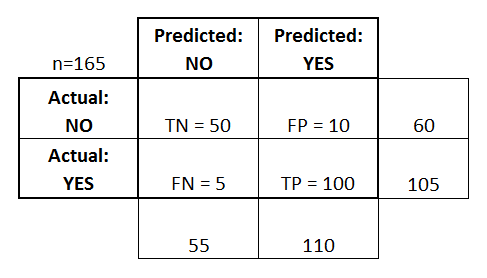

In [ ]:
from nltk.metrics.scores import (precision, recall, f_measure)


args = (
    round(precision(refsets['female'], testsets['female']), 2),
    round(precision(refsets['male'], testsets['male']), 2),
    round(recall(refsets['female'], testsets['female']), 2),
    round(recall(refsets['male'], testsets['male']), 2),
    round(f_measure(refsets['female'], testsets['female']), 2),
    round(f_measure(refsets['male'], testsets['male']), 2)
)

args2 = (
    round(precision(refsets2['female'], testsets2['female']), 2),
    round(precision(refsets2['male'], testsets2['male']), 2),
    round(recall(refsets2['female'], testsets2['female']), 2),
    round(recall(refsets2['male'], testsets2['male']), 2),
    round(f_measure(refsets2['female'], testsets2['female']), 2),
    round(f_measure(refsets2['male'], testsets2['male']), 2)
)

print('''
CLASSIFIER 1
------------ 
Female precision: {0}
Male precision: {1}
Female recall: {2}
Male recall: {3}
Female F1 score: {4}
Male F1 score: {5}

CLASSIFIER 2
------------ 
Female precision: {6}
Male precision: {7}
Female recall: {8}
Male recall: {9}
Female F1 score: {10}
Male F1 score: {11}
'''.format(*args, *args2))


CLASSIFIER 1
------------ 
Female precision: 0.78
Male precision: 0.68
Female recall: 0.8
Male recall: 0.64
Female F1 score: 0.79
Male F1 score: 0.66

CLASSIFIER 2
------------ 
Female precision: 0.79
Male precision: 0.74
Female recall: 0.85
Male recall: 0.65
Female F1 score: 0.82
Male F1 score: 0.69



## 7. Error analysis

In [ ]:
errors = []
for (name, tag) in test_names:
    guess = classifier2.classify(gender_features(name))
    if guess != tag:
        errors.append((tag, guess, name))

errors[:5]

[('male', 'female', 'Marsh'),
 ('female', 'male', 'Fan'),
 ('female', 'male', 'Edin'),
 ('male', 'female', 'Simone'),
 ('female', 'male', 'Keriann')]

In [ ]:
len(errors)

413

In [ ]:
for (tag, guess, name) in sorted(errors):
    print('Label = {:8} Predicted = {:8} name = {}'.format(tag, guess, name)) # :8 creates spaces between columns.

Label = female   Predicted = male     name = Adriaens
Label = female   Predicted = male     name = Adrien
Label = female   Predicted = male     name = Aleen
Label = female   Predicted = male     name = Alis
Label = female   Predicted = male     name = Alison
Label = female   Predicted = male     name = Allyson
Label = female   Predicted = male     name = Alyss
Label = female   Predicted = male     name = Ambur
Label = female   Predicted = male     name = Anet
Label = female   Predicted = male     name = Annabal
Label = female   Predicted = male     name = Ariel
Label = female   Predicted = male     name = Austin
Label = female   Predicted = male     name = Avis
Label = female   Predicted = male     name = Ayn
Label = female   Predicted = male     name = Beau
Label = female   Predicted = male     name = Bel
Label = female   Predicted = male     name = Beryl
Label = female   Predicted = male     name = Bill
Label = female   Predicted = male     name = Brandais
Label = female   Predicted 

Looking through this list of errors, it seems that some suffixes that are more than one letter long can be indicative of name genders. For example, names ending in *yn* appear to be predominantly female, despite the fact that names ending in *n* tend to be male; and names ending in *ch* are usually male, even though names that end in *h* tend to be female.

# ICP: Build a classifier with even more features

Based on the 2 `gender_features()` above, define your own features to extract from the text. It can be similar to mine (second letter from last text), or length of the words. 

You are not required to improve the accuracy of the classifier, but you need to successfully implement the function, generate train/test datasets, and train a classifier successfully. Report your model's performance in terms of `accuracy`, `precision`, `recall`, and `F1` score.

**Extra Credit**: Use another classifier from either `NLTK` or `Scikit-Learn`, and compare the performance against the Naive Bayes Classifier. (See content below for more information).


For this problem, I added the suffix (word before the last word)
```
gender_features3('John'):

{'first_letter': 'j',
 'suffix1': 'n',
 'suffix2': 'hn',
 'count(a)': 0,
 'has(a)': False,
 'count(b)': 0,
 'has(b)': False,
 'count(c)': 0,
 'has(c)': False,
 ...
 'has(x)': False,
 'count(y)': 0,
 'has(y)': False,
 'count(z)': 0,
 'has(z)': False
}
```

In [ ]:
def gender_features3(name):
    '''
    Add your code here
    '''
    ...
    ...
    return features

gender_features3('John')

{'first_letter': 'j',
 'suffix1': 'n',
 'suffix2': 'hn',
 'count(a)': 0,
 'has(a)': False,
 'count(b)': 0,
 'has(b)': False,
 'count(c)': 0,
 'has(c)': False,
 'count(d)': 0,
 'has(d)': False,
 'count(e)': 0,
 'has(e)': False,
 'count(f)': 0,
 'has(f)': False,
 'count(g)': 0,
 'has(g)': False,
 'count(h)': 1,
 'has(h)': True,
 'count(i)': 0,
 'has(i)': False,
 'count(j)': 1,
 'has(j)': True,
 'count(k)': 0,
 'has(k)': False,
 'count(l)': 0,
 'has(l)': False,
 'count(m)': 0,
 'has(m)': False,
 'count(n)': 1,
 'has(n)': True,
 'count(o)': 1,
 'has(o)': True,
 'count(p)': 0,
 'has(p)': False,
 'count(q)': 0,
 'has(q)': False,
 'count(r)': 0,
 'has(r)': False,
 'count(s)': 0,
 'has(s)': False,
 'count(t)': 0,
 'has(t)': False,
 'count(u)': 0,
 'has(u)': False,
 'count(v)': 0,
 'has(v)': False,
 'count(w)': 0,
 'has(w)': False,
 'count(x)': 0,
 'has(x)': False,
 'count(y)': 0,
 'has(y)': False,
 'count(z)': 0,
 'has(z)': False}

In [ ]:
#Convert labeled names into feature sets v3

featuresets3 = [(gender_features3(n), gender) for (n, gender) in labeled_names]


In [ ]:
#Create train, test_set based on your train/test set ratio
train_set3, test_set3 = ...
classifier3 = ...
round(accuracy(classifier3, test_set3), 2)

0.79

In [ ]:
classifier3.show_most_informative_features(15)

Most Informative Features
                 suffix2 = 'na'           female : male   =    147.6 : 1.0
                 suffix2 = 'la'           female : male   =     65.9 : 1.0
                 suffix2 = 'rt'             male : female =     48.3 : 1.0
                 suffix2 = 'ia'           female : male   =     47.7 : 1.0
                 suffix2 = 'us'             male : female =     35.6 : 1.0
                 suffix1 = 'a'            female : male   =     34.7 : 1.0
                 suffix2 = 'ld'             male : female =     32.7 : 1.0
                 suffix2 = 'sa'           female : male   =     31.0 : 1.0
                 suffix2 = 'ra'           female : male   =     30.2 : 1.0
                 suffix2 = 'rd'             male : female =     29.2 : 1.0
                 suffix1 = 'k'              male : female =     27.9 : 1.0
                 suffix2 = 'ta'           female : male   =     21.8 : 1.0
                 suffix2 = 'os'             male : female =     19.4 : 1.0

Adding the suffix into the set of features help establish some more patterns in the names and gender. It was able to push the classification accuracy to 79%

```
Most Informative Features
                 suffix2 = 'na'           female : male   =    147.6 : 1.0
                 suffix2 = 'la'           female : male   =     65.9 : 1.0
                 suffix2 = 'rt'             male : female =     48.3 : 1.0
                 suffix2 = 'ia'           female : male   =     47.7 : 1.0
                 suffix2 = 'us'             male : female =     35.6 : 1.0
                 suffix1 = 'a'            female : male   =     34.7 : 1.0
                 suffix2 = 'ld'             male : female =     32.7 : 1.0
                 suffix2 = 'sa'           female : male   =     31.0 : 1.0
                 suffix2 = 'ra'           female : male   =     30.2 : 1.0
                 suffix2 = 'rd'             male : female =     29.2 : 1.0
                 suffix1 = 'k'              male : female =     27.9 : 1.0
                 suffix2 = 'ta'           female : male   =     21.8 : 1.0
                 suffix2 = 'os'             male : female =     19.4 : 1.0
                 suffix1 = 'f'              male : female =     15.3 : 1.0
                 suffix2 = 'io'             male : female =     13.6 : 1.0
```

## More classifiers

Scikit-learn (sklearn) is a popular library which features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN.

NLTK provides an API to quickly use sklearn classifiers in `nltk.classify.scikitlearn`. The other option is to import and use sklearn directly.

For an example of integrating sklearn with NLTK, you can check out [this](https://www.kaggle.com/alvations/basic-nlp-with-nltk) notebook on Kaggle. Kaggle is a great website for NLP and machine learning in general, creating an account is highly recommended.


Scikit Learn:
```python
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB() 

# To train the classifier, simple do 
clf.fit(train_set, train_tags) 
```

NLTK: 

```
ConditionalExponentialClassifier


MaxentClassifier

NaiveBayesClassifier

WekaClassifier
```

## Maximum entropy classifier

Scikit-learn (sklearn) is a popular library which features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN.

NLTK provides an API to quickly use sklearn classifiers in `nltk.classify.scikitlearn`. The other option is to import and use sklearn directly.

For an example of integrating sklearn with NLTK, you can check out [this](https://www.kaggle.com/alvations/basic-nlp-with-nltk) notebook on Kaggle. Kaggle is a great website for NLP and machine learning in general, creating an account is highly recommended.

The principle of **maximum entropy** states that the probability distribution which best represents the current state of knowledge is the one with largest entropy.

The principle of maximum entropy is invoked when we have some piece(s) of information about a probability distribution, but not enough to characterize it completely—likely because we do not have the means or resources to do so. As an example, if all we know about a distribution is its average, we can imagine infinite shapes that yield a particular average. The principle of maximum entropy says that we should humbly choose the distribution that maximizes the amount of unpredictability contained in the distribution.

Taking the idea to the extreme, it wouldn’t be scientific to choose a distribution that simply yields the average value 100% of the time.

From all the models that fit our training data, the Maximum Entropy classifier selects the one which has the largest entropy. Due to the minimum assumptions that the Maximum Entropy classifier makes, it is usually used when we don’t know anything about the prior distributions and when it is unsafe to make any assumptions. Also, the maximum entropy classifier is used when we can’t assume the conditional independence of the features.

In [ ]:
from nltk import MaxentClassifier

me_classifier = MaxentClassifier.train(train_set3, max_iter=25) # max_iter has default value 100. In this example, the performance in terms of accuracy on the test set starts significantly improving beyond the previous model's at around 25 iterations.

My training improved when I used another classifier
```python
 ==> Training (25 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.370
             2          -0.60155        0.630
             3          -0.57970        0.630
             4          -0.55965        0.637
             5          -0.54133        0.666
             6          -0.52462        0.701
             7          -0.50938        0.730
             8          -0.49549        0.753
             9          -0.48283        0.765
            10          -0.47126        0.778
            11          -0.46068        0.787
            12          -0.45098        0.792
            13          -0.44208        0.798
            14          -0.43389        0.800
            15          -0.42633        0.802
            16          -0.41935        0.805
            17          -0.41289        0.806
            18          -0.40689        0.808
            19          -0.40132        0.809
            20          -0.39612        0.811
            21          -0.39128        0.812
            22          -0.38674        0.812
            23          -0.38250        0.812
            24          -0.37851        0.813
         Final          -0.37477        0.814
        
```

Test Accuracy: 
```python
round(accuracy(me_classifier, test_set3), 2) # Test accuracy
0.8
```

In [ ]:
me_classifier.show_most_informative_features(10)

```
-1.978 suffix2=='ia' and label is 'male'
-1.921 suffix2=='na' and label is 'male'
-1.515 suffix2=='sa' and label is 'male'
-1.463 suffix1=='a' and label is 'male'
-1.290 suffix2=='ra' and label is 'male'
-1.278 suffix1=='k' and label is 'female'
-1.197 suffix2=='rd' and label is 'female'
-1.169 suffix2=='do' and label is 'female'
-1.167 suffix2=='us' and label is 'female'
-1.166 suffix2=='ta' and label is 'male'
```